In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
#from sklearn.compose import ColumnTransformer, make_column_selector
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
artifacts = pd.read_csv('/data/p_dsi/teams2023/team2/ancient_artifacts_data/lithic_all_soil_joined_final.csv')
#artifacts = pd.read_csv('/Users/xueyuanli/Desktop/lithic_soil_joined.csv')
artifacts=artifacts.iloc[:,3:]
display(artifacts.tail(5))
artifacts.info()

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,lithic
409902,0.179,0.193,0.176,0.250,0.139,0.232,0.133,0.169,0.003,0.025,...,0.703,1.269,0.788,0.104,0.157,68.000,1.747,0.000,0.000,0
409903,0.260,0.285,0.263,0.708,0.145,0.784,0.144,0.256,0.014,0.053,...,0.372,1.809,0.553,0.231,0.204,52.857,5.428,0.789,0.161,0
409904,0.138,0.141,0.133,0.144,0.133,0.142,0.134,0.134,0.001,0.015,...,0.926,1.000,1.000,0.060,0.133,56.667,1.053,0.000,0.000,0
409905,0.241,0.252,0.239,0.302,0.160,0.304,0.158,0.247,0.006,0.046,...,0.790,1.489,0.672,0.184,0.200,56.667,1.921,0.000,0.000,0
409906,0.213,0.217,0.217,0.271,0.136,0.259,0.135,0.221,0.004,0.036,...,0.800,1.599,0.625,0.143,0.176,63.750,1.917,0.000,0.000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409907 entries, 0 to 409906
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Da                  409907 non-null  float64
 1   Dp                  409907 non-null  float64
 2   FWidth              409907 non-null  float64
 3   FLength             409907 non-null  float64
 4   FThickness          409907 non-null  float64
 5   ELength             409907 non-null  float64
 6   EThickness          409907 non-null  float64
 7   EWidth              409907 non-null  float64
 8   Volume              409907 non-null  float64
 9   Area                409907 non-null  float64
 10  Perimeter           409907 non-null  float64
 11  CHull  Area         409907 non-null  float64
 12  CHull Perimeter     409907 non-null  float64
 13  Sphericity          409907 non-null  float64
 14  L/T Ratio           409907 non-null  float64
 15  T/L Aspect Ratio    409907 non-nul

In [57]:
# Let's make a dataframe that has an equal # of lithic rows and soil rows 

import random
soil_df = artifacts.loc[artifacts.loc[:, 'lithic'] == 0]
soil_sample_ids = []
soil_df = soil_df.reset_index(drop = True)
soil_all_ids = list(soil_df.index.values)

for i in range (0, 4867):
    random_id = random.choice(soil_all_ids)
    soil_sample_ids.append(random_id)
    soil_all_ids.remove(random_id)

small_soil_df = pd.DataFrame(columns = soil_df.columns)
for i in range (0, 4867):
    soil_sample_row = soil_df.loc[soil_sample_ids[i]]
    small_soil_df.loc[len(small_soil_df)] = soil_sample_row
    
small_soil_df.head()

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,lithic
0,0.204,0.216,0.202,0.265,0.170,0.258,0.170,0.192,0.005,0.033,...,0.761,1.186,0.844,0.134,0.186,56.667,1.521,0.000,0.000,0.0
1,0.207,0.218,0.209,0.292,0.148,0.289,0.148,0.209,0.005,0.034,...,0.715,1.415,0.707,0.137,0.179,55.000,1.949,0.000,0.000,0.0
2,0.242,0.272,0.256,0.329,0.196,0.303,0.182,0.246,0.009,0.046,...,0.779,1.304,0.767,0.196,0.226,63.636,1.661,0.358,0.147,0.0
3,0.202,0.216,0.204,0.283,0.145,0.270,0.134,0.205,0.004,0.032,...,0.721,1.403,0.713,0.131,0.175,66.000,2.015,0.000,0.000,0.0
4,0.288,0.356,0.312,0.756,0.161,0.797,0.153,0.269,0.020,0.065,...,0.413,1.940,0.515,0.313,0.236,55.000,5.213,0.846,0.172,0.0


In [58]:
lithic_df = artifacts.loc[artifacts.loc[:, 'lithic'] == 1] 

equal_sample_df = pd.concat([small_soil_df, lithic_df])
equal_sample_df.sample(10)

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,lithic
2198,0.308,0.360,0.354,0.760,0.180,0.845,0.181,0.304,0.025,0.075,...,0.466,1.966,0.509,0.339,0.267,51.765,4.670,0.913,0.184,0.0
4866,0.040,0.086,0.045,0.112,0.045,0.041,0.024,0.024,0.000,0.001,...,0.400,1.000,1.000,0.010,0.045,110.000,1.732,0.125,0.010,1.0
160,0.138,0.307,0.127,0.276,0.127,0.324,0.108,0.108,0.002,0.015,...,0.459,1.000,1.000,0.109,0.127,80.000,3.003,0.449,0.034,0.0
3137,0.179,0.203,0.139,0.240,0.139,0.231,0.140,0.140,0.002,0.025,...,0.577,1.000,1.000,0.105,0.139,71.667,1.645,0.000,0.000,1.0
3773,0.165,0.198,0.164,0.256,0.117,0.234,0.103,0.151,0.003,0.021,...,0.641,1.401,0.714,0.090,0.140,85.000,2.275,0.224,0.117,1.0
2804,0.182,0.197,0.180,0.283,0.152,0.306,0.146,0.183,0.004,0.026,...,0.639,1.185,0.844,0.109,0.166,66.000,2.090,0.269,0.147,0.0
4193,0.220,0.236,0.207,0.327,0.166,0.300,0.165,0.209,0.006,0.038,...,0.632,1.248,0.801,0.155,0.186,58.571,1.816,0.264,0.171,0.0
1106,0.260,0.285,0.418,0.542,0.184,0.460,0.185,0.422,0.022,0.053,...,0.771,2.272,0.440,0.234,0.301,56.667,2.491,0.655,0.186,0.0
1716,0.228,0.290,0.134,0.412,0.134,0.392,0.131,0.131,0.004,0.041,...,0.325,1.000,1.000,0.164,0.134,68.000,2.986,0.347,0.117,1.0
1731,0.227,0.319,0.129,0.454,0.129,0.448,0.120,0.120,0.004,0.040,...,0.285,1.000,1.000,0.169,0.129,68.000,3.747,0.409,0.099,1.0


## Splitting the data into test and training sets

In [59]:
# machine learning libs
from sklearn.model_selection import train_test_split

lithic_column = ['lithic']
random_seed = 42

## USE THIS IF YOU WANT TO SELECT SPECIFIC FEATURES, input strings into feature selections
#feature_selection = []
#features = artifacts.drop('lithic', axis=1)[[feature_selection]]
##

feature_selection = ['L/W Ratio', 'T/W Ratio', 'Circularity', 'Angularity', 'Transparency']
features = equal_sample_df.drop('lithic', axis=1)[feature_selection]

## Delete this after implement code above
# features = artifacts.drop('lithic', axis=1).iloc[:,-5:]
# features
target = equal_sample_df[lithic_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, 
                                                    random_state=random_seed, 
                                                    stratify=equal_sample_df[lithic_column])

In [60]:
features

,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
0,1.314,0.844,0.898,56.667,0.487
1,1.398,0.707,0.895,55.000,0.432
2,1.284,0.767,0.790,63.636,0.587
3,1.386,0.713,0.878,66.000,0.496
4,2.423,0.515,0.653,55.000,0.395
...,...,...,...,...,...
4862,2.000,1.000,0.114,120.000,0.651
4863,2.500,1.000,0.214,110.000,0.601
4864,4.000,1.000,0.161,87.500,0.601
4865,4.000,1.000,0.161,116.667,0.653


Check if our target column is removed from testing and training datasets

In [61]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (7300, 5)


,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
489,1.270,1.000,0.932,50.000,0.520
3012,1.448,0.816,0.870,68.000,0.398
4431,1.457,0.810,0.907,68.000,0.373
3781,1.760,0.856,0.836,56.667,0.417
215,3.625,1.000,0.467,38.333,0.426



On X test: 
X test dimensions:  (2434, 5)


,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
1192,2.480,0.926,0.640,66.000,0.500
1772,1.265,0.800,0.931,68.000,0.443
4770,2.198,0.455,0.646,57.500,0.527
4565,1.874,0.695,0.747,55.556,0.448
2079,1.269,0.911,0.656,81.000,0.638


In [62]:
X_train

,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
489,1.270,1.000,0.932,50.000,0.520
3012,1.448,0.816,0.870,68.000,0.398
4431,1.457,0.810,0.907,68.000,0.373
3781,1.760,0.856,0.836,56.667,0.417
215,3.625,1.000,0.467,38.333,0.426
...,...,...,...,...,...
906,7.994,1.000,0.242,48.571,0.556
969,1.589,0.728,0.865,58.750,0.429
3531,2.142,1.000,0.750,68.000,0.530
1787,5.633,1.000,0.324,87.500,0.526


In [63]:
# Y Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# Y test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (7300, 1)


,lithic
489,0.0
3012,0.0
4431,0.0
3781,0.0
215,1.0



On y test: 
y test dimensions:  (2434, 1)


,lithic
1192,1.0
1772,0.0
4770,0.0
4565,0.0
2079,0.0


## Data Preprocessing - Imputation

In [64]:
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train.values.ravel())
y_train_transformed = le.transform(y_train.values.ravel())
y_test_transformed = le.transform(y_test.values.ravel())
#le.classes_

In [65]:
X_train

,L/W Ratio,T/W Ratio,Circularity,Angularity,Transparency
489,1.270,1.000,0.932,50.000,0.520
3012,1.448,0.816,0.870,68.000,0.398
4431,1.457,0.810,0.907,68.000,0.373
3781,1.760,0.856,0.836,56.667,0.417
215,3.625,1.000,0.467,38.333,0.426
...,...,...,...,...,...
906,7.994,1.000,0.242,48.571,0.556
969,1.589,0.728,0.865,58.750,0.429
3531,2.142,1.000,0.750,68.000,0.530
1787,5.633,1.000,0.324,87.500,0.526


## Modeling and Evaluation

#### Model 1: Random Forest

In [66]:
np.unique(y_train_transformed)

array([0, 1])

In [67]:
X_train_transformed

array([[-0.80921134,  0.92384912,  1.21964817, -1.10812074,  0.57848701],
       [-0.63985139,  0.00928185,  0.85843576, -0.00868286, -0.89493319],
       [-0.63128824, -0.020541  ,  1.07399801, -0.00868286, -1.19686356],
       ...,
       [ 0.02046213,  0.92384912,  0.15931495, -0.00868286,  0.69925915],
       [ 3.34201041,  0.92384912, -2.32256392,  1.18237483,  0.65095029],
       [-0.62938532,  0.92384912, -2.07787164,  0.80062557,  1.49635533]])

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1217
           1       0.97      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



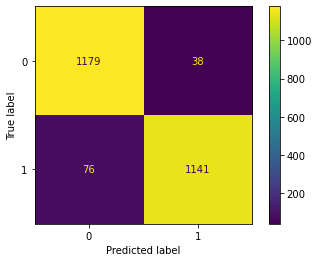

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
random_seed = 42

rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.2f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

#### Model 2: SVM

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1217
           1       0.96      0.95      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



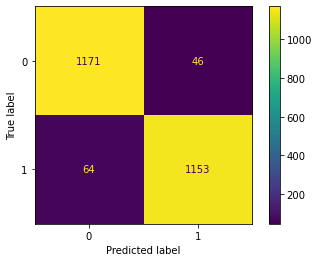

In [69]:
from sklearn.svm import SVC

#svc = SVC(gamma='auto',probability=True)
svc = SVC(probability=True)

svc.fit(X_train_transformed, y_train_transformed)

pred_svc = svc.predict(X_test_transformed)

print('Accuracy of SVM classifier on training set: {:.2f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc.score(X_test_transformed, y_test_transformed)))

print(classification_report(y_test_transformed, pred_svc))

cm_svc = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc.classes_)
disp.plot()

plt.show()


#### Model 3: XGBoost

Accuracy of XGBoost classifier on training set: 1.00
Accuracy of XGBoost classifier on test set: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1217
           1       0.96      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434



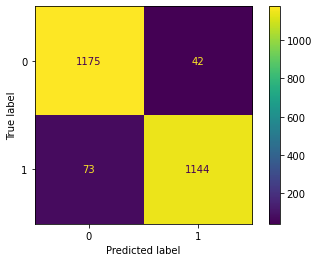

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train_transformed, y_train_transformed)

pred_xgb = xgb.predict(X_test_transformed)


print('Accuracy of XGBoost classifier on training set: {:.2f}'.format(xgb.score(X_train_transformed, y_train_transformed)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test_transformed, y_test_transformed)))

print(classification_report(y_test_transformed, pred_xgb))

cm_xgb = confusion_matrix(y_test_transformed, xgb.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=svc.classes_)
disp.plot()

plt.show()


#### Model4: Logistic Regression

In [71]:
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  

# Imports required for model evaluation   
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve,auc  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

scaler = MinMaxScaler()   
X_train_trans = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

# Prepare the model  
log_reg = LogisticRegression(solver="lbfgs")    
# Fit the model  
log_reg.fit(X_train_trans, y_train.values.ravel())     
# Predict the target vectors  
y_pred_log_reg = log_reg.predict(X_test) 

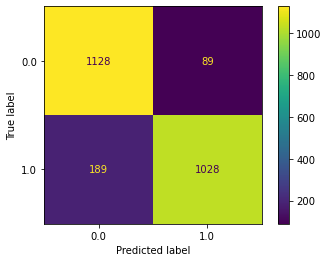

In [72]:
# Plot out a confusion matrix    
cm_xgb = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [73]:
# Print the precision, recall and f1-scores  
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(log_reg .score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(log_reg .score(X_test, y_test)))

log_reg_accuracy = accuracy_score(y_pred_log_reg, y_test)  
print(f"Logistic regression accuracy: {round(log_reg_accuracy * 100)}%")  

#print(classification_report(y_test_transformed, pred_xgb))
print(classification_report(y_test, y_pred_log_reg))  

Accuracy of Logistic regression classifier on training set: 0.50
Accuracy of Logistic regression classifier on test set: 0.89
Logistic regression accuracy: 89%
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      1217
         1.0       0.92      0.84      0.88      1217

    accuracy                           0.89      2434
   macro avg       0.89      0.89      0.89      2434
weighted avg       0.89      0.89      0.89      2434



/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


The ROC curve, along with the AUC score, confirms the previous assumptions. Even though the accuracy rate is a pretty good 83.8% and the ROC curve and AUC score support the success of this model, the difference in the recall rates and the F1 scores are worth investigating.

## Pipeline

In [74]:
# we need to build two separate pipes, one for handling numeric data and the other for categorical data
# Available strategies: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

num_pipeline = Pipeline(steps=[('scale_num', StandardScaler())])


In [75]:
# now we establish preprocessing pipe by columns
from sklearn.compose import ColumnTransformer

num_cols = ['L/W Ratio', 'T/W Ratio', 'Circularity', 'Angularity', 'Transparency']
preproc = ColumnTransformer([('num_pipe', num_pipeline, num_cols)],
                            remainder='passthrough')

#### Random Forest Pipeline

In [76]:
# Generate the entire training pipeline with preprocessing and modeling
rf_pipe = Pipeline(steps=[('preproc', preproc),
                       ('rfmdl', RandomForestClassifier())])

# visualization of the pipeline
with config_context(display='diagram'):
    display(rf_pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  ['L/W Ratio', 'T/W Ratio',
                                                   'Circularity', 'Angularity',
                                                   'Transparency'])])),
                ('rfmdl', RandomForestClassifier())])

###### Hyper-parameter tuning

In [77]:
# 5 - we will use the pipeline for cross validation and hyperparameter tuning
param_grid = { 
    'rfmdl__n_estimators': [100, 200, 500],
    'rfmdl__max_features': ['auto', 'sqrt', 'log2'],
    'rfmdl__max_depth' : [4,5,6,7,8],
    'rfmdl__criterion' :['gini', 'entropy']
}

# now we will feed the training set to our training pipeline
rf_grid_search = GridSearchCV(rf_pipe, param_grid=param_grid, cv= 5)
rf_grid_search.fit(X_train, y_train)

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/accre/arch/easybuild/softwa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         ['L/W '
                                                                          'Ratio',
                                                                          'T/W '
                                                                          'Ratio',
                                                                          'Circularity',
                                                                          'Angularity',
                                           

In [78]:
print(rf_grid_search.best_score_)
rf_grid_search.best_params_

0.956027397260274


{'rfmdl__criterion': 'gini',
 'rfmdl__max_depth': 8,
 'rfmdl__max_features': 'auto',
 'rfmdl__n_estimators': 100}

###### Variable Importance

In [79]:
# Printing our target classes
rf_grid_search.classes_

array([0., 1.])

In [80]:
# get how important each feature was in training the forest
# Each index correspond to each feature. Here it is ['L/W Ratio', 'Angularity', 'Sieve', 'Surface Area']
coefs = rf_grid_search.best_estimator_['rfmdl'].feature_importances_
coefs

array([0.14446239, 0.50292814, 0.08389414, 0.20590382, 0.06281152])

In [81]:
# get back the numerical features - recall that index 1 was the num_pipe
feature_names = rf_grid_search.best_estimator_.named_steps['preproc'].transformers_[0][2]
feature_names

['L/W Ratio', 'T/W Ratio', 'Circularity', 'Angularity', 'Transparency']

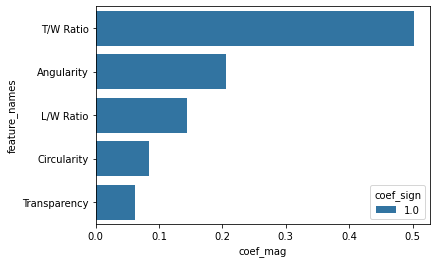

In [82]:
# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([feature_names]), 'feature_imp': coefs})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['feature_imp']),
                             coef_sign = np.sign(coef_info['feature_imp']))

# sort the coef_info dataframe and plot with a barplot! 
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

#### SVM

In [83]:
# generate the entire training pipeline with preprocessing and modeling
# visualization of the pipeline

svc_pipe = Pipeline(steps=[('preproc', preproc),
                       ('svcmdl', SVC())])

with config_context(display='diagram'):
    display(svc_pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  ['L/W Ratio', 'T/W Ratio',
                                                   'Circularity', 'Angularity',
                                                   'Transparency'])])),
                ('svcmdl', SVC())])

###### Hyper-parameter tuning

In [84]:
## Check the list of available parameters
svc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'svcmdl', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__verbose_feature_names_out', 'preproc__num_pipe', 'preproc__num_pipe__memory', 'preproc__num_pipe__steps', 'preproc__num_pipe__verbose', 'preproc__num_pipe__scale_num', 'preproc__num_pipe__scale_num__copy', 'preproc__num_pipe__scale_num__with_mean', 'preproc__num_pipe__scale_num__with_std', 'svcmdl__C', 'svcmdl__break_ties', 'svcmdl__cache_size', 'svcmdl__class_weight', 'svcmdl__coef0', 'svcmdl__decision_function_shape', 'svcmdl__degree', 'svcmdl__gamma', 'svcmdl__kernel', 'svcmdl__max_iter', 'svcmdl__probability', 'svcmdl__random_state', 'svcmdl__shrinking', 'svcmdl__tol', 'svcmdl__verbose'])

In [85]:
# 5 - we will use the pipeline for cross validation and hyperparameter tuning
svc_param_grid = {'svcmdl__kernel': ['rbf', 'poly', 'sigmoid'],
                  'svcmdl__C': [0.1,1, 10, 100], 
                  'svcmdl__gamma': [1,0.1,0.01,0.001]}


# now we will feed the training set to our training pipeline
svc_grid_search = GridSearchCV(svc_pipe, param_grid=svc_param_grid, cv= 5, refit=True)
svc_grid_search.fit(X_train, y_train)

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-pac

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         ['L/W '
                                                                          'Ratio',
                                                                          'T/W '
                                                                          'Ratio',
                                                                          'Circularity',
                                                                          'Angularity',
                                           

In [86]:
# get how important each feature was in training the forest
# Each index correspond to each feature. Here it is ['L/W Ratio', 'Angularity', 'Sieve', 'Surface Area']
svccoefs = svc_grid_search.best_params_
svccoefs

{'svcmdl__C': 100, 'svcmdl__gamma': 0.1, 'svcmdl__kernel': 'rbf'}

###### Variable Importance

In [87]:
print(svc_grid_search.best_score_)
svc_grid_search.feature_names_in_

0.9571232876712328


array(['L/W Ratio', 'T/W Ratio', 'Circularity', 'Angularity',
       'Transparency'], dtype=object)

In [88]:
### Not Sure how to get the weight yet, asking professor Dana because SVC functions is not linear 
###so coef_, feature_importance, and best_estimators do not work

#### xgboost

In [89]:
xgb_pipe = Pipeline(steps=[('preproc', preproc),
                       ('xgbmdl', XGBClassifier())])

with config_context(display='diagram'):
    display(xgb_pipe)


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  ['L/W Ratio', 'T/W Ratio',
                                                   'Circularity', 'Angularity',
                                                   'Transparency'])])),
                ('xgbmdl',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               e...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

###### Hyper-parameter tuning

In [90]:
xgb_param_grid = {"xgbmdl__subsample": [0.8], 
                  "xgbmdl__colsample_bytree": [0.8], 
                  "xgbmdl__learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                  "xgbmdl__n_estimators": range(50,500,50)
              }

# now we will feed the training set to our training pipeline
xgb_grid_search = GridSearchCV(xgb_pipe, param_grid=xgb_param_grid, cv= 5, refit=True)
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         ['L/W '
                                                                          'Ratio',
                                                                          'T/W '
                                                                          'Ratio',
                                                                          'Circularity',
                                                                          'Angularity',
                                           

In [91]:
# get how important each feature was in training the forest
# Each index correspond to each feature. Here it is ['L/W Ratio', 'Angularity', 'Sieve', 'Surface Area']
xgbcoefs = xgb_grid_search.best_params_
xgbcoefs

{'xgbmdl__colsample_bytree': 0.8,
 'xgbmdl__learning_rate': 0.1,
 'xgbmdl__n_estimators': 150,
 'xgbmdl__subsample': 0.8}

###### Variable Importance

In [92]:
#This gives you the weight of each features. The highest = the best feature for training. Here the third index is 'seive'
xgb_feature_weights = xgb.feature_importances_
xgb_feature_weights

array([0.07702287, 0.66252273, 0.05879169, 0.14557873, 0.05608401],
      dtype=float32)

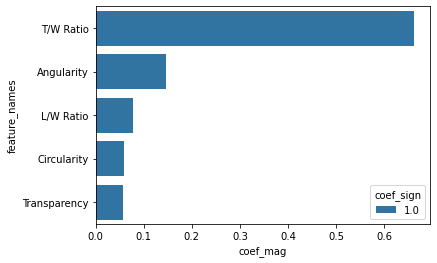

In [93]:
# score coefficients into a new dataframe
xgb_coef_info = pd.DataFrame({'feature_names': np.hstack([feature_names]), 'feature_imp': xgb_feature_weights})

# get sign and magnitude of the weights (coefs)
xgb_coef_info = xgb_coef_info.assign(coef_mag = abs(xgb_coef_info['feature_imp']),
                             coef_sign = np.sign(xgb_coef_info['feature_imp']))

# sort the coef_info dataframe and plot with a barplot! 
xgb_coef_info = xgb_coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=xgb_coef_info.index, x='coef_mag', hue='coef_sign', data=xgb_coef_info, orient='h', dodge=False);

**Logistic Regression**

In [94]:
lr_pipe = Pipeline(steps=[('preproc', preproc),
                       ('lrmdl', LogisticRegression(solver="lbfgs") )])

with config_context(display='diagram'):
    display(lr_pipe)



Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  ['L/W Ratio', 'T/W Ratio',
                                                   'Circularity', 'Angularity',
                                                   'Transparency'])])),
                ('lrmdl', LogisticRegression())])

In [95]:
## Check the list of available parameters
lr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'lrmdl', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__verbose_feature_names_out', 'preproc__num_pipe', 'preproc__num_pipe__memory', 'preproc__num_pipe__steps', 'preproc__num_pipe__verbose', 'preproc__num_pipe__scale_num', 'preproc__num_pipe__scale_num__copy', 'preproc__num_pipe__scale_num__with_mean', 'preproc__num_pipe__scale_num__with_std', 'lrmdl__C', 'lrmdl__class_weight', 'lrmdl__dual', 'lrmdl__fit_intercept', 'lrmdl__intercept_scaling', 'lrmdl__l1_ratio', 'lrmdl__max_iter', 'lrmdl__multi_class', 'lrmdl__n_jobs', 'lrmdl__penalty', 'lrmdl__random_state', 'lrmdl__solver', 'lrmdl__tol', 'lrmdl__verbose', 'lrmdl__warm_start'])

###### Hyper-parameter tuning

In [96]:
# 5 - we will use the pipeline for cross validation and hyperparameter tuning
lr_tuning_grid = {'lrmdl__penalty' : ['l1', 'l2', 'elasticnet'],
               'lrmdl__l1_ratio' : np.linspace(0,1,5),
               'lrmdl__C': np.logspace(-1, 6, 3) }


lr_grid_search = GridSearchCV(lr_pipe, param_grid = lr_tuning_grid, cv = 5, return_train_score=True, n_jobs=-1)
lr_grid_search.fit(X_train, y_train.values.ravel())

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/pyt

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/pyt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         ['L/W '
                                                                          'Ratio',
                                                                          'T/W '
                                                                          'Ratio',
                                                                          'Circularity',
                                                                          'Angularity',
                                           

In [97]:
print(lr_grid_search.best_score_)
lr_grid_search.best_params_

0.8819178082191781


{'lrmdl__C': 0.1, 'lrmdl__l1_ratio': 0.0, 'lrmdl__penalty': 'l2'}

###### Variable Importance

In [98]:
# Get the weights of our features used in the best model (estimator)
lr_coefs = lr_grid_search.best_estimator_['lrmdl'].coef_[0]
lr_coefs

array([ 1.19800151,  1.34270122, -1.22342811,  1.23662524, -0.51523162])

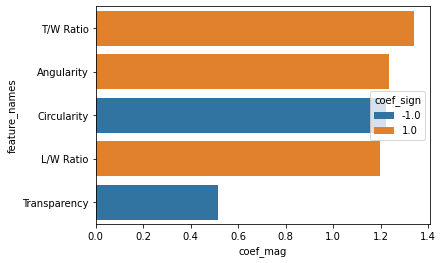

In [99]:
# score coefficients into a new dataframe
lr_coef_info = pd.DataFrame({'feature_names': np.hstack([feature_names]), 'feature_imp': lr_coefs})

# get sign and magnitude of the weights (coefs)
lr_coef_info = lr_coef_info.assign(coef_mag = abs(lr_coef_info['feature_imp']),
                             coef_sign = np.sign(lr_coef_info['feature_imp']))

# sort the coef_info dataframe and plot with a barplot! 
lr_coef_info = lr_coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=lr_coef_info.index, x='coef_mag', hue='coef_sign', data=lr_coef_info, orient='h', dodge=False);

In [100]:
lr_coef_info

,feature_imp,coef_mag,coef_sign
feature_names,,,
T/W Ratio,1.342701,1.342701,1.0
Angularity,1.236625,1.236625,1.0
Circularity,-1.223428,1.223428,-1.0
L/W Ratio,1.198002,1.198002,1.0
Transparency,-0.515232,0.515232,-1.0


## Model Evaluation 

**The resulting plot from that will show how the model really performs.**

random forest


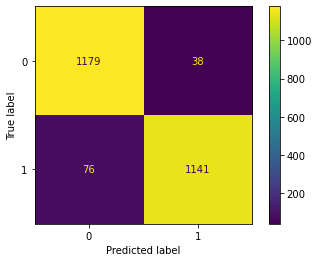

svm


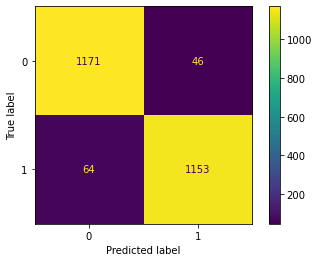

xgboost


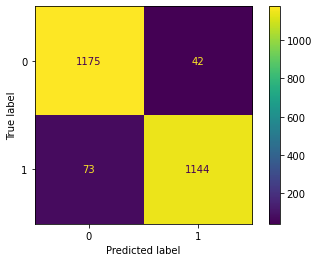

logistic regression


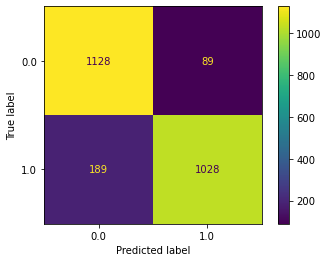

In [101]:
def metrics(predict,classes):
    cm = confusion_matrix(y_test_transformed, predict(X_test_transformed))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    
print("random forest")
plt.show(metrics(rf.predict,rf.classes_))
print("svm")
plt.show(metrics(svc.predict,svc.classes_))
print("xgboost")
plt.show(metrics(xgb.predict,xgb.classes_))
print("logistic regression")
cm_xgb = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=log_reg.classes_)
disp.plot()
plt.show()


When performing classification predictions, there's four types of outcomes that could occur.

(1) True positives are when you predict an observation belongs to a class and it actually does belong to that class.

(2) True negatives are when you predict an observation does not belong to a class and it actually does not belong to that class.

(3) False positives occur when you predict an observation belongs to a class when in reality it does not.

(4) False negatives occur when you predict an observation does not belong to a class when in fact it does.

**So from four plots below, we can find that XGBoost model has the most true positives which is 973. And logistic regression model has the most true negatives which is 25767.**

**Additionally, XGBoost and Random Forest seem to have very similar performance**

#### The three main metrics used to evaluate a classification model are accuracy, precision, and recall.

In [102]:
def accuracy(score,model_name,predict):
    print(model_name, 'classifier accuracy on training set: {:.2f}'.format(score(X_train_transformed, y_train_transformed)))
    print(model_name, 'classifier accuracy on testing set: {:.2f}'.format(score(X_test_transformed, y_test_transformed)))
    pred = predict(X_test_transformed)
    print(classification_report(y_test_transformed, pred))

accuracy(rf.score,"Random Forest",rf.predict)
accuracy(svc.score,"SVM",svc.predict)
accuracy(xgb.score,"XGBoost",xgb.predict)

# Print the precision, recall and f1-scores  
print('Logistic regression classifier accuracy on training set: {:.2f}'.format(log_reg .score(X_train, y_train)))
print('Logistic regression classifier accuracy on testing set: {:.2f}'.format(log_reg .score(X_test, y_test)))
log_reg_accuracy = accuracy_score(y_pred_log_reg, y_test)  
print(classification_report(y_test, y_pred_log_reg)) 

Random Forest classifier accuracy on training set: 1.00
Random Forest classifier accuracy on testing set: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1217
           1       0.97      0.94      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434

SVM classifier accuracy on training set: 0.96
SVM classifier accuracy on testing set: 0.95
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1217
           1       0.96      0.95      0.95      1217

    accuracy                           0.95      2434
   macro avg       0.95      0.95      0.95      2434
weighted avg       0.95      0.95      0.95      2434

XGBoost classifier accuracy on training set: 1.00
XGBoost classifier accuracy on testing set: 0.95
              precision    recall  f1-score  

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### (1) Accuracy

Accuracy is defined as the percentage of correct predictions for the test data. 

-- **Accuracy on training set: Random Forest(1.0) > XGBoost(0.99) > SVM(0.98) > Logistic regression(0.96)**


Random Forest has the highest accuracy on training set.

Logistic regression has the lowest accuracy on training set.


-- **Accuracy on testing set: Random Forest(0.98) = XGBoost(0.98) = SVM(0.98) > Logistic regression(0.96)**

Random Forest, XGBoost, SVM have almost the same accuracy on testing set.

Logistic regression has the lowest accuracy on testing set.

### (2) Precision 
Precision is defined as the fraction of relevant examples (true positives) 

**lithic data: XGBoost(0.93) > Random Forest(0.92) = SVM(0.92) = Logistic regression(0.92)**

**soil data: Random Forest(0.99) = SVM(0.99) > XGBoost(0.98) > Logistic regression(0.96)**

### (3) Recall
Recall is defined as the fraction of examples which were predicted to belong to a class with respect to all of the examples that truly belong in the class.

**lithic data: XGBoost(0.73) > Random Forest(0.72) > SVM(0.63) > Logistic regression(0.16)**

**soil data: Random Forest(1.0) = SVM(1.0) = XGBoost(1.0)  Logistic regression(1.0)**

### (4) ROC and AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:(1) True Positive Rate  (2)False Positive Rate

AUC: Area Under the ROC Curve

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

In [103]:
# Plot ROC curve and calculate AUC score  
# The resulting ROC curve, along with the AUC score looks like this:  
def plot_roc_curve(X_test, y_test, model, model_name="Classifier"):  
    
    # The line below is equivalent to  
    y_predicted = model.predict(X_test)  
 
    # The line below is equivalent to  
    y_predicted_proba = model.predict_proba(X_test)  
    
    auc_roc_log_reg = roc_auc_score(y_test, y_predicted)  
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])  
   
    plt.plot(fpr, tpr, color="red", lw=2,   
              label=f"{model_name} (area = {auc_roc_log_reg:0.5f})")  
    plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--",   
              label="Mean model (area = 0.500)")  
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    plt.xlabel("False Positive Rate")  
    plt.ylabel("True Positive Rate")  
    plt.title("Receiver operating characteristic")  
    plt.legend(loc="lower right")  
    plt.show()  
   
    # Calculate the auc score  
    auc_score = auc(fpr, tpr)  
    print(f"auc_score: {round(auc_score, 3)}.")  

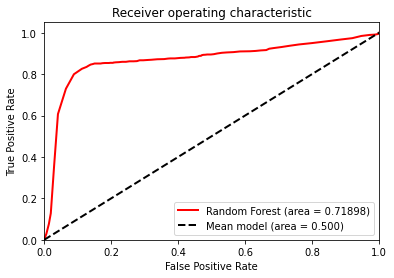

auc_score: 0.869.


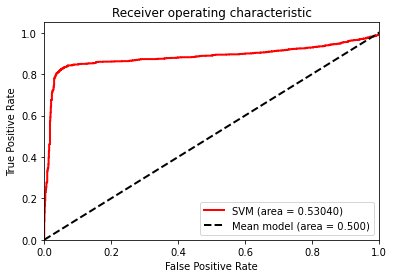

auc_score: 0.883.


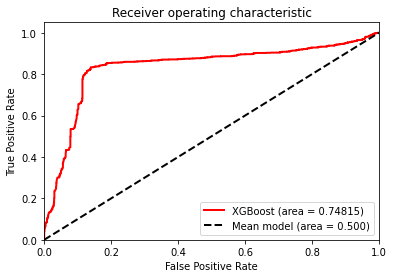

auc_score: 0.835.


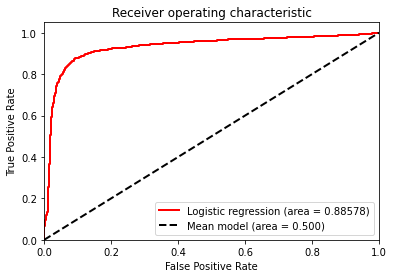

auc_score: 0.932.


In [104]:
plot_roc_curve(X_test, y_test, rf, "Random Forest") 
plot_roc_curve(X_test, y_test, svc, "SVM") 
plot_roc_curve(X_test, y_test, xgb, "XGBoost") 
plot_roc_curve(X_test, y_test, log_reg, "Logistic regression") 


**AUC :Logistic regression(0.838) > Random Forest(0.536) > XGBoost(0.509) > SVM(0.185)**

### (5) Bias & Variance

In [105]:
!pip install mlxtend
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
import pandas as pd


Defaulting to user installation because normal site-packages is not writeable


In [106]:
mse, bias, var = bias_variance_decomp(log_reg , X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=1)

#y_pred=xgb.predict(X_test.values.ravel())
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

AttributeError: 'numpy.ndarray' object has no attribute 'values'